In [102]:
import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits()

In [103]:
df = pd.DataFrame(digits.data,digits.target)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [104]:
df['target']= digits.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [105]:
X = df.drop(['target'],axis='columns')
y = df['target']

In [106]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [107]:
len(X_train)

1257

In [108]:
len(X_test)

540

In [167]:
from sklearn.model_selection import RandomizedSearchCV
clf = RandomizedSearchCV(KNeighborsClassifier(), {
           'n_neighbors': range(1,10)
},cv=80,return_train_score=False,n_iter=6)

clf.fit(digits.data,digits.target)

RandomizedSearchCV(cv=80, estimator=KNeighborsClassifier(), n_iter=6,
                   param_distributions={'n_neighbors': range(1, 10)})

In [162]:
df = pd.DataFrame(clf.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split23_test_score,split24_test_score,split25_test_score,split26_test_score,split27_test_score,split28_test_score,split29_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000795,0.001349,0.004604,0.003364,7,{'n_neighbors': 7},0.966667,0.966667,0.983333,0.983333,...,1.000000,1.0,0.983333,0.966667,0.898305,1.000000,0.966102,0.981591,0.020586,4
1,0.000781,0.001562,0.003517,0.005044,9,{'n_neighbors': 9},0.950000,0.966667,0.983333,0.983333,...,1.000000,1.0,0.983333,0.966667,0.898305,0.983051,0.966102,0.978249,0.021366,6
2,0.000325,0.000743,0.004166,0.005808,2,{'n_neighbors': 2},0.950000,0.966667,0.983333,0.983333,...,0.983333,1.0,0.983333,0.983333,0.966102,1.000000,0.983051,0.984416,0.013589,3
3,0.001047,0.001765,0.003384,0.003055,3,{'n_neighbors': 3},0.983333,0.983333,0.983333,1.000000,...,1.000000,1.0,0.983333,0.983333,0.932203,1.000000,0.983051,0.985508,0.014240,2
4,0.000847,0.001584,0.003982,0.002957,8,{'n_neighbors': 8},0.983333,0.966667,0.983333,0.983333,...,1.000000,1.0,0.983333,0.966667,0.915254,0.983051,0.966102,0.981036,0.017791,5
5,0.000559,0.001113,0.004150,0.003073,4,{'n_neighbors': 4},0.950000,0.983333,0.983333,0.983333,...,1.000000,1.0,0.983333,0.983333,0.949153,1.000000,0.983051,0.986073,0.013742,1


In [163]:
df[['param_n_neighbors','mean_test_score']]

,param_n_neighbors,mean_test_score
0,7,0.981591
1,9,0.978249
2,2,0.984416
3,3,0.985508
4,8,0.981036
5,4,0.986073


In [166]:
clf.best_score_

0.9877619047619046

In [157]:
clf.best_params_

{'n_neighbors': 3}

In [158]:
from sklearn.metrics import confusion_matrix

y_pred = knn.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
cm

array([[58,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 49,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 48,  0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0, 64,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 61,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 46,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 51,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 57,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 44,  1],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 56]], dtype=int64)

Text(42.0, 0.5, 'Truth')

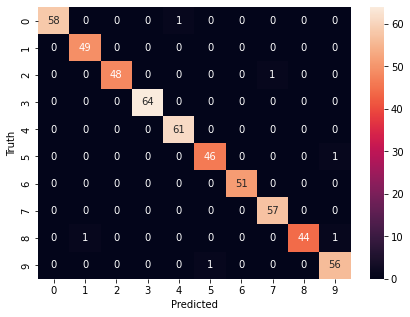

In [159]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot= True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [160]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        59
           1       0.98      1.00      0.99        49
           2       1.00      0.98      0.99        49
           3       1.00      1.00      1.00        64
           4       0.98      1.00      0.99        61
           5       0.98      0.98      0.98        47
           6       1.00      1.00      1.00        51
           7       0.98      1.00      0.99        57
           8       1.00      0.96      0.98        46
           9       0.97      0.98      0.97        57

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540

